In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(Matrix)
library(cowplot)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [2]:
## Load data
rgc <- readRDS(file = paste0("./load_files/RGC_filtered_seu_04112022.rds"))
rm_cells <- colnames(rgc)[rgc@meta.data$cluster == "Ependymal" & rgc@meta.data$nFeature_RNA < 1250] ## low-qual cells
rgc <- rgc[, setdiff(colnames(rgc), rm_cells)]

png 
  2

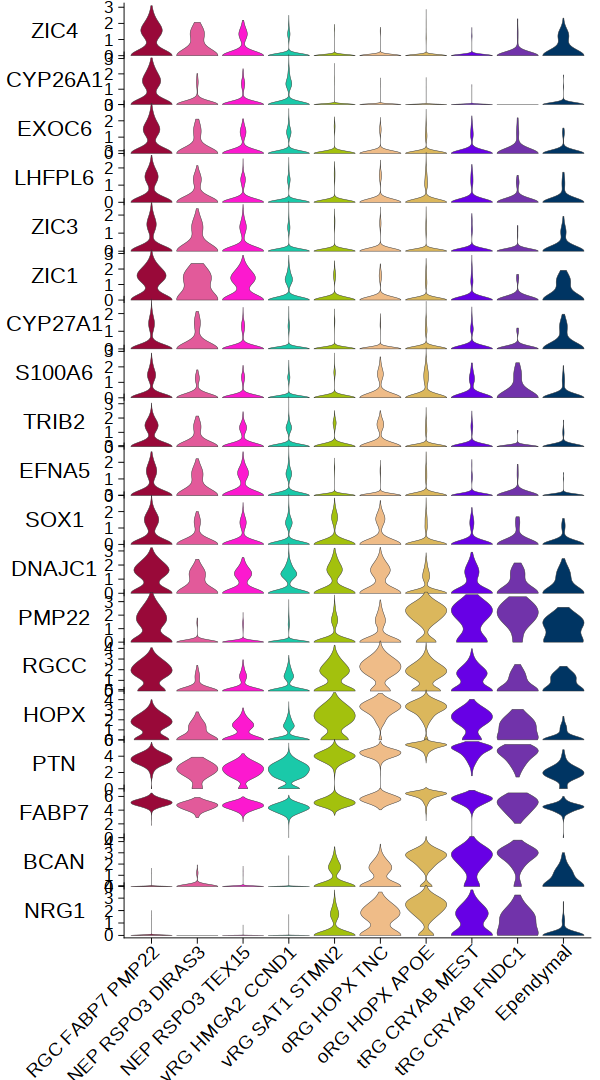

In [3]:
##---------------------------------------------------------------------------
## Showing the markers for the frontal-specific NSC subtype
## Using only FC cells
fc_rgc <- subset(rgc, lobe %in% "FC")


features <- c("ZIC4", "CYP26A1", "EXOC6", "LHFPL6", "ZIC3", "ZIC1", "CYP27A1", "S100A6", "TRIB2", 
              "EFNA5", "SOX1", "DNAJC1") %>%
            c(., "PMP22", "RGCC", "HOPX", "PTN", "FABP7", "BCAN", "NRG1") %>% unique()
cls_cols <- c("#990939", "#e25a9a", "#fc19cf", "#1ac9a9", "#a3c10d", 
            "#efbc88", "#dbb75c", "#6700e5", "#7133aa", "#003563"
            ) %>%
            setNames(., c("RGC FABP7 PMP22", 
            "NEP RSPO3 DIRAS3", "NEP RSPO3 TEX15", "vRG HMGA2 CCND1", "vRG SAT1 STMN2", 
            "oRG HOPX TNC", "oRG HOPX APOE", 
            "tRG CRYAB MEST", "tRG CRYAB FNDC1", "Ependymal"))
pdata <- fc_rgc@meta.data[, c("cluster", "cbnage")] %>%
            cbind(., t(fc_rgc$RNA@data[features, ])) %>%
            mutate(cluster = factor(cluster, levels = names(cls_cols)))

plist <- lapply(features, function(gg) {
    p <- ggplot(pdata, aes_string(x = "cluster", y = gg, fill = "cluster")) + 
            geom_violin(scale = "width", size = 0.1, adjust = 2,trim =TRUE) + 
            theme_cowplot() + 
            scale_fill_manual(values = cls_cols) +
            labs(y = gg) +
            theme(axis.title.x = element_blank(), 
                  axis.title.y = element_text(size = rel(0.9), angle = 0, hjust = 1, vjust = 0.5), 
                  axis.text.x = element_blank(), 
                  axis.line.x = element_blank(), 
                  axis.ticks.x = element_blank(), 
                  axis.text.y = element_text(size = rel(0.8)), 
                  axis.line.y = element_line(size = 0.2), 
                  axis.ticks.y = element_line(size = 0.2), 
                  legend.position = "none", 
                  plot.margin = unit(c(-0.05, 0, -0.05, 0), "in"))
    p
    })

plist[[length(features)]] <- plist[[length(features)]] +
            theme(axis.text.x=element_text(size = rel(0.9), angle = 45, hjust = 1, vjust = 1), 
                  axis.line.x = element_line(size = 0.2), axis.ticks.x = element_line(size = 0.2)) 
pcbn2 <- patchwork::wrap_plots(plist, nrow = length(features), ncol = 1)
options(repr.plot.width=5, repr.plot.height=9, res = 300)
pcbn2


pdf(paste0("./report/", "FR_Speccls_expr_violin_ONLY_inFC.pdf"), width = 5, height = 7)
print(pcbn2)
dev.off()



png 
  2

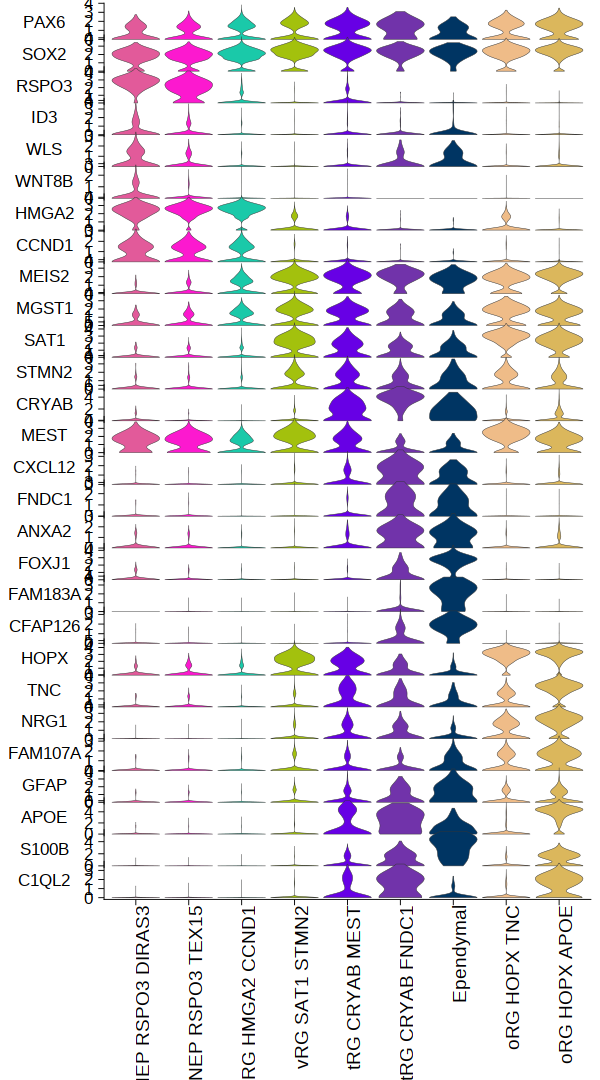

In [4]:
## Violin plots showing some known and new markers [exclude the frontal-specific subtype in this case]
sel_cls <- c("NEP RSPO3 DIRAS3", "NEP RSPO3 TEX15", "vRG HMGA2 CCND1", 
             "vRG SAT1 STMN2", "oRG HOPX TNC", "oRG HOPX APOE", "tRG CRYAB MEST", "tRG CRYAB FNDC1", "Ependymal")
rgc <- rgc[, rgc@meta.data$cluster %in% sel_cls]

features <- c("PAX6", "SOX2", "RSPO3", "ID3", "WLS", "WNT8B", "HMGA2", "CCND1", 
              "MEIS2", "MGST1", "SAT1", "STMN2", "CRYAB", "MEST", "CXCL12", "FNDC1", 
              "ANXA2", "FOXJ1", "FAM183A", "CFAP126", 
              "HOPX", "TNC", "NRG1", "FAM107A", "GFAP", "APOE", "S100B", "C1QL2")

sel_cls <- c("NEP RSPO3 DIRAS3", "NEP RSPO3 TEX15", "vRG HMGA2 CCND1", 
             "vRG SAT1 STMN2", "tRG CRYAB MEST", "tRG CRYAB FNDC1", "Ependymal", "oRG HOPX TNC", "oRG HOPX APOE")
cls_cols <- cls_cols[2:10]

pdata <- rgc@meta.data[, c("cluster", "cbnage")] %>%
            cbind(., t(rgc$RNA@data[features, ])) %>%
            subset(., cluster %in% sel_cls) %>%
            mutate(cluster = factor(cluster, levels = sel_cls))

plist <- lapply(features, function(gg) {
    p <- ggplot(pdata, aes_string(x = "cluster", y = gg, fill = "cluster")) + 
            geom_violin(scale = "width", size = 0.1, adjust = 2,trim =TRUE) + 
            theme_cowplot() + 
            scale_fill_manual(values = cls_cols) +
            labs(y = gg) +
            theme(axis.title.x = element_blank(), 
                  axis.title.y = element_text(size = rel(0.7), angle = 0, hjust = 1, vjust = 0.5), 
                  axis.text.x = element_blank(), 
                  axis.line.x = element_blank(), 
                  axis.ticks.x = element_blank(), 
                  axis.text.y = element_text(size = rel(0.8)), 
                  axis.line.y = element_line(size = 0.2), 
                  axis.ticks.y = element_line(size = 0.2), 
                  legend.position = "none", 
                  plot.margin = unit(c(-0.05, 0, -0.05, 0), "in"))
    p
    })

plist[[length(features)]] <- plist[[length(features)]] +
            theme(axis.text.x=element_text(size = rel(0.9), angle = 90, hjust = 1, vjust = 1), 
                  axis.line.x = element_line(size = 0.2), axis.ticks.x = element_line(size = 0.2)) 
pcbn <- patchwork::wrap_plots(plist, nrow = length(features), ncol = 1)
options(repr.plot.width=5, repr.plot.height=9, res = 300)
pcbn

pdf(paste0("./report/", "RGC_markers_expr_violin.pdf"), width = 5, height = 9)
print(pcbn)
dev.off()

In [5]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS:   /gpfs/ycga/home/sm2726/packages/R_versions/R-3.6.1/lib64/R/lib/libRblas.so
LAPACK: /gpfs/ycga/home/sm2726/packages/R_versions/R-3.6.1/lib64/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cowplot_1.0.0 Matrix_1.2-18 ggplot2_3.3.0 dplyr_1.0.7   Seurat_3.1.5 

loaded via a namespace (and not attached):
 [1] nlme_3.1-147        tsne_0.1-3          RcppAnnoy_0.0.16   
 [4] RCo